# Voting Influence and Concentration Analysis (VICA)

## Process Data

In [1]:
import pandas as pd
from data_processor import process_data

# # Process from raw data (if raw data has been updated)
# df_token_house_top_200, df_citizen_house, df_summary = process_data()
# df_token_house_top_200.to_csv('../data/token_house.csv')
# df_citizen_house.to_csv('../data/citizen_house.csv')
# df_summary.to_csv('../data/summary.csv')

# Use processed data from 2024-07-01
df_token_house_top_200 = pd.read_csv('../data/token_house.csv')
df_citizen_house = pd.read_csv('../data/citizen_house.csv')
df_summary = pd.read_csv('../data/summary.csv')

## Run VICA

In [ ]:
from vica import *

# further process data and convert to R
(prop_token_filter, prop_cit_filter,prop_token_filter_add, prop_cit_filter_add) = process_data_and_convert_to_r(df_token_house_top_200, df_citizen_house, df_summary)
# run VICA
results_dict = run_vica_all(prop_token_filter, prop_cit_filter,prop_token_filter_add, prop_cit_filter_add)
# Get states
df_stats = run_stats(results_dict)


## Save Results and Upload to Dune

In [3]:
results_output_file_path = '../results/results.csv'

df_stats.to_csv(results_output_file_path,mode='a',header=not pd.io.common.file_exists(results_output_file_path),index=False)


In [4]:
from dune_uploader import upload_data

upload_data(results_output_file_path)

## Explore and Expirement

In [9]:
results_dict['token_house'].keys()

dict_keys(['similarity_matrix', 'community_detection', 'louvain_member', 'logistic_regression'])

In [27]:
prop_token_filter_add[2]

array(['0x3eee61b92c36e97be6319bf9096a1ac3c04a1466',
       '0x5e349eca2dc61abcd9dd99ce94d04136151a09ee',
       '0x1b686ee8e31c5959d9f5bbd8122a58682788eead', ...,
       '0xf79a4ce9bd79f43257e24986dd35c3dfc5da5460',
       '0xf3e112e0c32e7a30da87517e98a22103ade76d01',
       '0xc3e8ac233f02d13c1e299e47ae230c205e0177ed'], dtype='<U42')

In [36]:
num_groups = np.unique(np.array(results_dict['token_house']['community_detection'][1])).size
print(num_groups)
np.log(num_groups)

46


np.float64(3.828641396489095)

In [38]:
num_groups = np.array(results_dict['citizen_house']['community_detection'][1]).size
print(num_groups)
np.log(num_groups)

44


np.float64(3.784189633918261)

In [48]:
num_groups = np.array(results_dict['both_houses']['logistic_regression']['factual']['logit_effect']).size
print(num_groups)
np.log(num_groups)

15


np.float64(2.70805020110221)

In [ ]:

df_re = results_to_df(results_dict)
df_re.to_csv('../results/logit_effects.csv')

In [102]:
df_re.columns

Index(['entity', 'scenario_type', 'regression_type', 'value', 'Date'], dtype='object')

In [108]:
df_re.scenario_type.unique()

array(['factual', 'counterfactual'], dtype=object)

In [46]:
print(Centrality_statistics(np.array([2.97041446, 20.7015627 , 22.372731  , 22.372731  ,  2.94443897])))

                   Statistic       Value
1                   Variance 107.1556090
2                   Skewness  -0.3952378
3                   Kurtosis   1.1730536
4           Gini Coefficient   0.3265547
5 Herfindahl-Hirschman Index   0.2800000
6                    Entropy   1.3321790
7                         CV   0.7252892



In [ ]:
results_dict['token_house']['logistic_regression']['factual']['adjusted_logit_effect']

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

community_membership = np.array(results_dict['token_house']['community_detection'][1])

# Count occurrences of each community
community_counts = Counter(community_membership)

# Plot the bar chart for community sizes
plt.figure(figsize=(12, 6))
plt.bar(community_counts.keys(), community_counts.values(), color='skyblue')
plt.xlabel('Community')
plt.ylabel('Number of Nodes')
plt.title('Community Sizes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [64]:


community_membership = np.array(results_dict['token_house']['community_detection'][1])
community_counts = Counter(community_membership)

df1 = pd.DataFrame(list(community_counts.items()), columns=['community', 'counts'])
df1['community'] = df1['community'].astype(int)
df1['house'] = 'token'

In [65]:
community_membership = np.array(results_dict['citizen_house']['community_detection'][1])
community_counts = Counter(community_membership)

df2 = pd.DataFrame(list(community_counts.items()), columns=['community', 'counts'])
df2['community'] = df2['community'].astype(int)
df2['house'] = 'citizen'

In [67]:
df_community = pd.concat([df1,df2])

In [70]:
df_community.to_csv('../results/community_detection.csv',index=False)

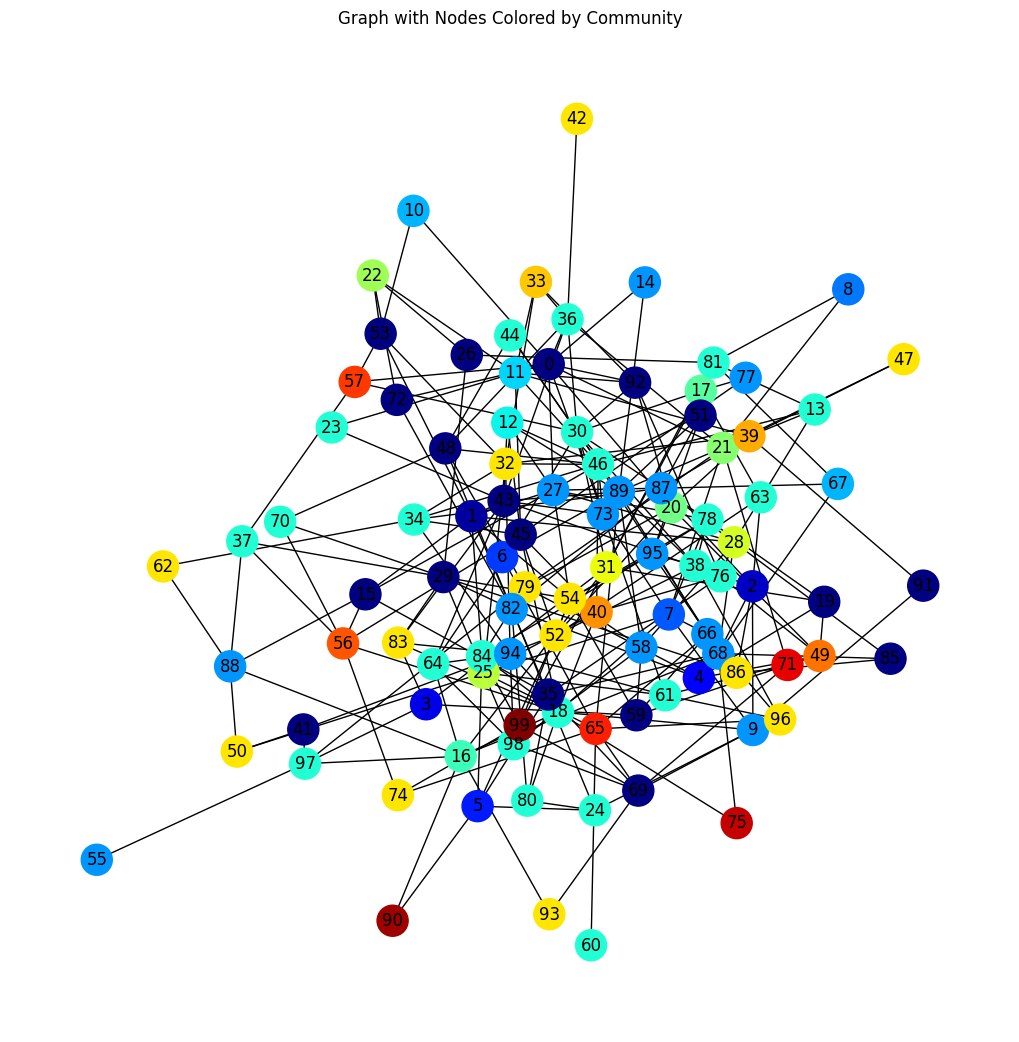

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Simulated graph with 100 nodes and some edges (replace this with your actual graph)
G = nx.erdos_renyi_graph(100, 0.05)

# Assign colors to nodes based on their community
colors = [community_membership[i] for i in G.nodes()]

# Draw the graph with node colors corresponding to communities
plt.figure(figsize=(10, 10))
nx.draw(G, node_color=colors, with_labels=True, cmap=plt.cm.jet, node_size=500)
plt.title("Graph with Nodes Colored by Community")
plt.show()


In [8]:
t = results_dict['token_house']['logistic_regression']['factual']['adjusted_logit_effect']
t = t[~np.isnan(t)]
np.var(t)

np.float64(70.77467641365277)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_points=1
# Simulate additional data points for various entities, scenario types, and regression types
entities = ['token_house', 'citizen_house', 'both_houses']
scenario_types = ['factual']
regression_types = ['logit_effect', 'adjusted_logit_effect']
dates = df_stats.Date.unique()

# Convert to a DataFrame
df_simulated =  df_stats

# Plot the variance over time for each combination of Entity, Scenario_Type, and Regression_Type
plt.figure(figsize=(12, 8))

# Plotting for each unique combination
for entity in entities:
    for scenario in scenario_types:
        for regression in regression_types:
            subset = df_simulated[(df_simulated['Entity'] == entity) &
                                  (df_simulated['Scenario_Type'] == scenario) &
                                  (df_simulated['Regression_Type'] == regression) &
                                  (df_simulated['Statistic'] == 'Variance')]
            if not subset['Value'].empty:
                if subset['Value'].values[0]!=0:
                    plt.plot(subset['Date'], subset['Value'],  marker='o', markersize=8, label=f'{entity}, {scenario}, {regression}')

# Customize the plot
plt.title('Variance Over Time by Entity, Scenario_Type, and Regression_Type')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()
